In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [7]:
image_path = "../Output_videos/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


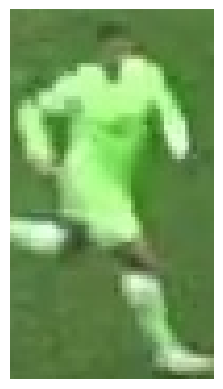

In [13]:
plt.imshow(image)
plt.axis("off")
plt.show()

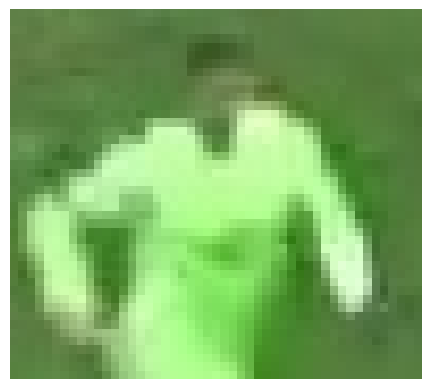

In [15]:
# Cut the T-Shirt

top_half_image = image[0:int(image.shape[0]/2),:]
plt.imshow(top_half_image)
plt.axis("off")
plt.show()

# Segment The Image

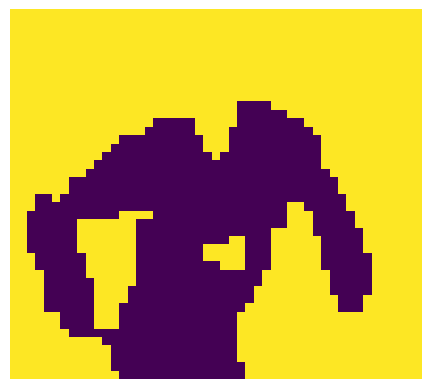

In [21]:
image_2d = top_half_image.reshape(-1,3)
kmean = KMeans(n_clusters=2,random_state=0).fit(image_2d)

# Get the clusters labels
labels = kmean.labels_

# reshape the labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0],top_half_image.shape[1])

# Display results

plt.imshow(clustered_image)
plt.axis("off")
plt.show()

In [23]:
corner_clusters = [clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters),key=corner_clusters.count)
print(non_player_cluster)

1


In [24]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [26]:
kmean.cluster_centers_[player_cluster]

array([171.38378378, 235.65405405, 142.8472973 ])